# Introduction
This project has been carried out on a hosuing price data set. the object of this project was to prediction of a house price above the median or not. An oprnsource library called "keras" has been used to build the prediction model. We have used a Deep Learning pipeline through a Neural Network. The following steps have been use for the networks.

Data source : https://drive.google.com/file/d/1GfvKA0qznNVknghV4botnNxyH-KvODOC/view

##### - Exploring and Processing the Data
##### - Building and Training our Neural Network
##### - Visualizing Loss and Accuracy
##### - Adding Regularization to our Neural Network

# 1. Exploring and Processing of the Data

#### Data reading
#### X and Y features identification
#### Data scaling or Normalization
#### train, validation, and test set splitting

#### 1.1 Data reading

In [1]:
import pandas as pd

# data reading
df = pd.read_csv("housepricedata.csv")

In [2]:
# data set view
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [3]:
# columns
df.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea',
       'AboveMedianPrice'],
      dtype='object')

In [4]:
# brief info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
LotArea             1460 non-null int64
OverallQual         1460 non-null int64
OverallCond         1460 non-null int64
TotalBsmtSF         1460 non-null int64
FullBath            1460 non-null int64
HalfBath            1460 non-null int64
BedroomAbvGr        1460 non-null int64
TotRmsAbvGrd        1460 non-null int64
Fireplaces          1460 non-null int64
GarageArea          1460 non-null int64
AboveMedianPrice    1460 non-null int64
dtypes: int64(11)
memory usage: 125.6 KB


In [5]:
# data frame to arrays for computational analysis
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

#### 1.2 X and Y features

In [6]:
# Let´s define X and Y features

X = dataset[:,0:10]
Y = dataset[:,10]

#### 1.3 Normalization/Scalling

We can see here in this dataset, there is a scalling problem like, some values are in thousands, some are 0 to 1. However, let´s do normalization/scalling by using sklearn.

In [7]:
# sklearn import
from sklearn import preprocessing

from prepocessing package of sklearn, we can use "min-max scaler" function. 

In [8]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
#X_scale

#### 1.4 Train Test Split

In [9]:
from sklearn.model_selection import train_test_split

Now the dataset spliting

In [10]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

Now again let´s split the validation and test (val_and_test) data into...

In [11]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test,Y_val_and_test, test_size=0.5)

In [12]:
# Shape of the data split
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


# 1.2 Building and Training the Neural Network

#### Specifing the model architecture
#### Filling the best numbers

#### 1.2.1 Specifing the model architecture

In [13]:
# keras
import tensorflow as tf
from tensorflow import keras


from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [14]:
model = tf.keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(10,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

##### 1.2.2 Filling the best numbers

- Right optimizer
- Loss function
- Metrics to track apart from the loss function

In [15]:
# configuring the model
model.compile(optimizer="sgd", loss="binary_crossentropy", metrics=["accuracy"])

- sgd refers to Stochastic Gradient Descent, but here it refers to "mini-batch grdient descent"
- binary_crossentropy refers to the outputs that take the values 0 or 1 
- accuracy : tracking accuracy on top of loss function

In [16]:
# Training the model
hist = model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
1022/1022 [==============================] - 1s 756us/sample - loss: 0.6811 - accuracy: 0.5460 - val_loss: 0.6799 - val_accuracy: 0.5616
Epoch 2/100
1022/1022 [==============================] - 0s 107us/sample - loss: 0.6750 - accuracy: 0.5685 - val_loss: 0.6737 - val_accuracy: 0.5708
Epoch 3/100
1022/1022 [==============================] - 0s 107us/sample - loss: 0.6688 - accuracy: 0.6076 - val_loss: 0.6683 - val_accuracy: 0.6210
Epoch 4/100
1022/1022 [==============================] - 0s 119us/sample - loss: 0.6636 - accuracy: 0.6477 - val_loss: 0.6635 - val_accuracy: 0.6530
Epoch 5/100
1022/1022 [==============================] - 0s 109us/sample - loss: 0.6588 - accuracy: 0.6517 - val_loss: 0.6588 - val_accuracy: 0.6667
Epoch 6/100
1022/1022 [==============================] - 0s 97us/sample - loss: 0.6539 - accuracy: 0.6908 - val_lo

- batch_size : size of mini batch
- epoch : how long we want to train the model

In [17]:
# Evaluating the model
model.evaluate(X_test, Y_test)[1] # index 1 beacuse this function returns at first index "loss" and at 2nd "accuracy"

219/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.88584477

# Visualizing Loss and Accuracy

to see if there is any overfitting in our model.

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

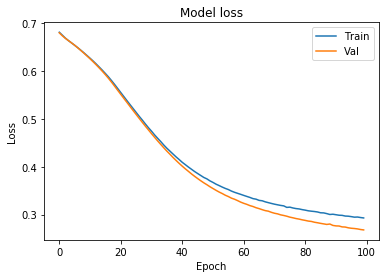

In [19]:
# Training loss Vs. Validation loss
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper right")
plt.show()

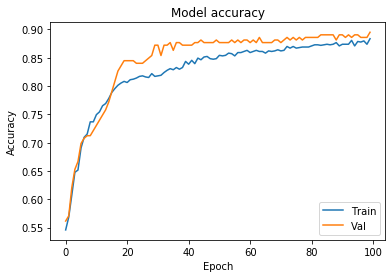

In [20]:
# Training accuracy and Validation accuracy
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="lower right")
plt.show()

# 1.4 Adding Regularization to our Neural Network

For the sake of introducing regularization to our neural network, let’s formulate with a neural network that will badly overfit on our training set. We’ll call this Model_2

In [21]:
model_2=tf.keras.Sequential([keras.layers.Dense(1000, activation="relu", input_shape=(10,)),
                            keras.layers.Dense(1000, activation="relu"),
                            keras.layers.Dense(1000, activation="relu"),
                            keras.layers.Dense(1000, activation="relu"),
                            keras.layers.Dense(1, activation="sigmoid")])

model_2.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

hist_2 = model_2.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 2s 2ms/sample - loss: 0.4813 - accuracy: 0.7603 - val_loss: 0.3412 - val_accuracy: 0.8767
Epoch 2/100
1022/1022 [==============================] - 1s 573us/sample - loss: 0.3349 - accuracy: 0.8620 - val_loss: 0.2860 - val_accuracy: 0.8904
Epoch 3/100
1022/1022 [==============================] - 1s 547us/sample - loss: 0.3195 - accuracy: 0.8640 - val_loss: 0.3039 - val_accuracy: 0.8858
Epoch 4/100
1022/1022 [==============================] - 1s 520us/sample - loss: 0.2881 - accuracy: 0.8836 - val_loss: 0.2198 - val_accuracy: 0.8995
Epoch 5/100
1022/1022 [==============================] - 1s 498us/sample - loss: 0.2786 - accuracy: 0.8875 - val_loss: 0.2632 - val_accuracy: 0.8995
Epoch 6/100
1022/1022 [==============================] - 1s 523us/sample - loss: 0.2732 - accuracy: 0.8816 - val_loss: 0.2305 - val_accuracy: 0.9041
Epoch 7/100
1022/1022 [==============================] - 1s 5

Here, we’ve made a much larger model and we’ve use the Adam optimizer. Adam is one of the most common optimizers we use, which adds some tweaks to stochastic gradient descent such that it reaches the lower loss function faster. 

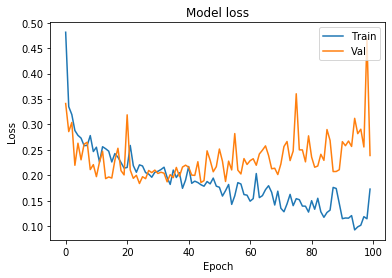

In [22]:
# loss Vs. val_loss
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

This is a clear sign of over-fitting. The training loss is decreasing, but the validation loss is way above the training loss and increasing (past the inflection point of Epoch 20). If we plot accuracy using the code below:

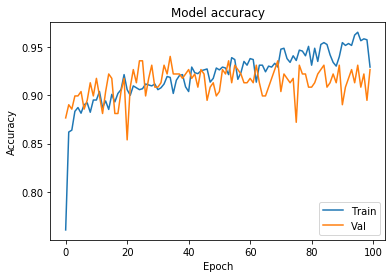

In [23]:
# Accuracy Vs. Val_accuracy
plt.plot(hist_2.history["accuracy"])
plt.plot(hist_2.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="lower right")
plt.show()

Now, let’s try out some of our strategies to reduce over-fitting (apart from changing our architecture back to our first model).

#### Reduction of overfitting!

First, let’s import the code that we need for L2 regularization and dropout:

In [24]:
from keras.layers import Dropout
from keras import regularizers

In [25]:
model_3 = tf.keras.Sequential()
model_3.add(keras.layers.Dense(1000,activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)))
model_3.add(keras.layers.Dropout(0.3))
model_3.add(keras.layers.Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_3.add(keras.layers.Dropout(0.3))
model_3.add(keras.layers.Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_3.add(keras.layers.Dropout(0.3))
model_3.add(keras.layers.Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_3.add(keras.layers.Dropout(0.3))
model_3.add(keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))

In [26]:
# Compiling and Fitting

model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 2s 2ms/sample - loss: 14.2298 - accuracy: 0.6213 - val_loss: 3.8621 - val_accuracy: 0.8265
Epoch 2/100
1022/1022 [==============================] - 1s 648us/sample - loss: 1.6809 - accuracy: 0.8102 - val_loss: 0.6511 - val_accuracy: 0.8767
Epoch 3/100
1022/1022 [==============================] - 1s 604us/sample - loss: 0.5998 - accuracy: 0.8425 - val_loss: 0.5728 - val_accuracy: 0.8311
Epoch 4/100
1022/1022 [==============================] - 1s 611us/sample - loss: 0.5427 - accuracy: 0.8591 - val_loss: 0.4594 - val_accuracy: 0.8904
Epoch 5/100
1022/1022 [==============================] - 1s 605us/sample - loss: 0.4952 - accuracy: 0.8689 - val_loss: 0.4997 - val_accuracy: 0.8721
Epoch 6/100
1022/1022 [==============================] - 1s 618us/sample - loss: 0.5054 - accuracy: 0.8611 - val_loss: 0.5004 - val_accuracy: 0.8539
Epoch 7/100
1022/1022 [==============================] - 1s 

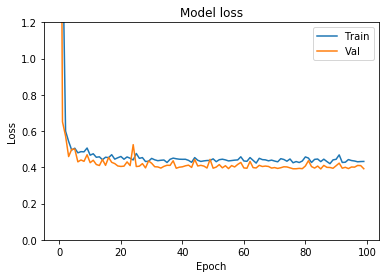

In [27]:
# Plot of loss Vs. val_loss

plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

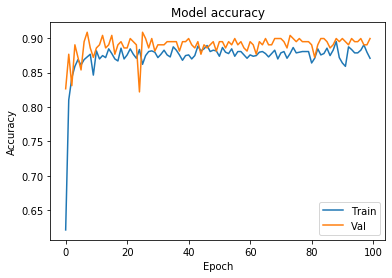

In [28]:
# Accuracy Vs. val_accuracy

plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

Compared to our model in Model 2, we’ve reduced overfitting substantially! And that’s how we apply our regularization techniques to reduce overfitting to the training set.To deal with overfitting, we can code in the following strategies into our model each with about one line of code:
- L2 Regularization
- Dropout

If we visualize the training / validation loss and accuracy, we can see that these additions have helped deal with overfitting!